In [2]:
# --- Cell 1: Our Detective Toolkit (Importing Libraries) ---
# Let's gather the tools we'll need for our investigation.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Our "expert opinion" model
from sklearn.feature_selection import RFE          # Our "elimination" method tool
from sklearn.feature_selection import SelectKBest, chi2 # Our "statistical" method tools

In [3]:
# --- Cell 2: Setting the Scene ---
# We'll start with our clean data and separate it into the clues (X) and the outcome (y).
# We also split it into a training set, which we'll use for our investigation.

print("--- Loading our clean data for the investigation ---")
df = pd.read_csv('../data/heart_disease_cleaned.csv')
X = df.drop('target', axis=1)
y = df['target']

# We split the data so our methods can learn on one part (train) and be tested on another.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data is loaded and ready.")

--- Loading our clean data for the investigation ---
Data is loaded and ready.


--- Method 1: Consulting our Random Forest expert ---


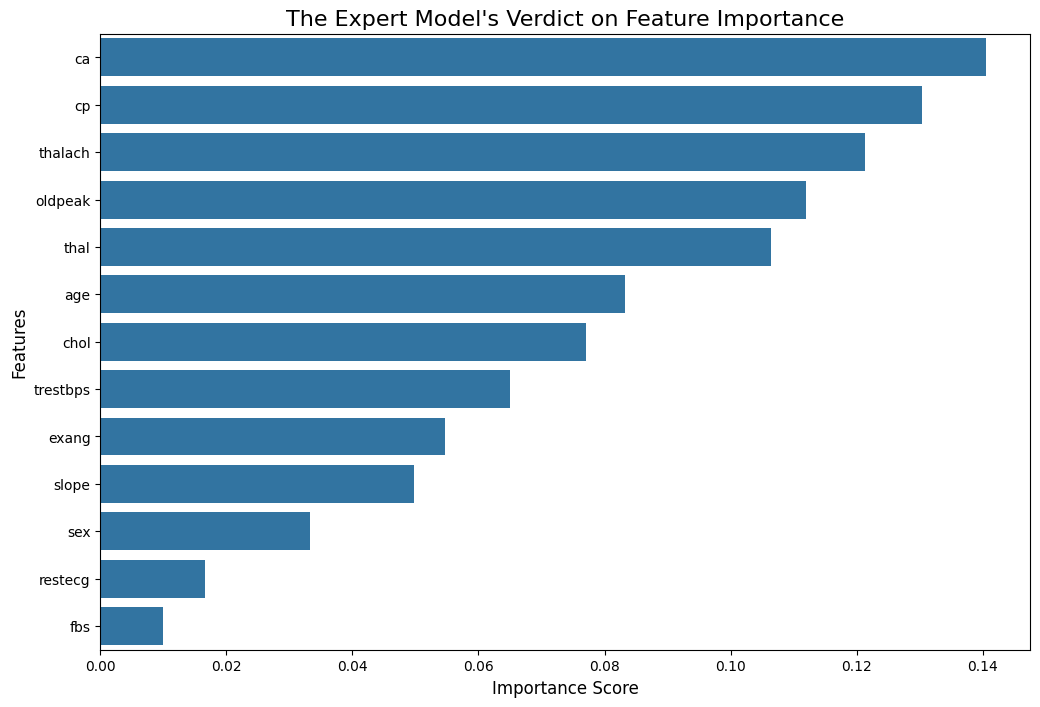


--- The Expert's Ranked List of Clues ---
ca          0.140525
cp          0.130438
thalach     0.121361
oldpeak     0.111902
thal        0.106356
age         0.083218
chol        0.077027
trestbps    0.064991
exang       0.054679
slope       0.049733
sex         0.033206
restecg     0.016682
fbs         0.009881
dtype: float64


In [4]:
# --- Cell 3: Method 1 - Asking an Expert (Random Forest Importance) ---
# A Random Forest model is like a committee of many decision-makers. After it learns,
# we can ask it: "Which clues did you find most useful for making your decisions?"
# Features that are consistently used to make decisions are considered more important.

print("--- Method 1: Consulting our Random Forest expert ---")
# First, we train our expert model on the training data.
rf_expert = RandomForestClassifier(n_estimators=100, random_state=42)
rf_expert.fit(X_train, y_train)

# Now, let's get its opinion on which features mattered most.
importances = pd.Series(rf_expert.feature_importances_, index=X.columns).sort_values(ascending=False)

# Let's visualize the expert's opinion. Longer bars mean more important features.
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=importances.index)
plt.title('The Expert Model\'s Verdict on Feature Importance', size=16)
plt.xlabel('Importance Score', size=12)
plt.ylabel('Features', size=12)
plt.show()

print("\n--- The Expert's Ranked List of Clues ---")
print(importances)

In [5]:
# --- Cell 4: Method 2 - The Elimination Tournament (Recursive Feature Elimination) ---
# This method, called RFE, is like a survival tournament for features.
# It starts with all features, builds a model, and eliminates the single worst-performing feature.
# It repeats this process over and over until only the strongest features are left.

print("\n--- Method 2: Running the Elimination Tournament (RFE) ---")
# We'll use the same expert model as our judge and ask for the top 8 survivors.
rfe_judge = RandomForestClassifier(n_estimators=100, random_state=42)
selector = RFE(estimator=rfe_judge, n_features_to_select=8, step=1)
selector.fit(X_train, y_train)

# Let's see which features survived the tournament.
surviving_features = X.columns[selector.support_]
print("\nThe top 8 features that survived the elimination tournament are:")
print(surviving_features.tolist())


--- Method 2: Running the Elimination Tournament (RFE) ---

The top 8 features that survived the elimination tournament are:
['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']


In [6]:
# --- Cell 5: Method 3 - The Statistician's Approach (Chi-Square Test) ---
# This method is different. It doesn't build a big model. Instead, it's a pure statistical test
# that examines each feature one-by-one against the target (heart disease).
# It asks: "Is the relationship between this feature and the outcome statistically significant,
# or could it just be due to random chance?"

print("\n--- Method 3: Consulting the Statistician (Chi-Square Test) ---")
# We'll ask the Chi-Square test to select the 8 features with the strongest statistical link.
chi_selector = SelectKBest(score_func=chi2, k=8)
chi_selector.fit(X, y)

# Let's see which features the statistician flagged as most significant.
significant_features = X.columns[chi_selector.get_support()]
print("\nThe top 8 features with the strongest statistical significance are:")
print(significant_features.tolist())


--- Method 3: Consulting the Statistician (Chi-Square Test) ---

The top 8 features with the strongest statistical significance are:
['age', 'cp', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']
